# Assignment 1
## Problem 1 - System Identification

In [ ]:
%reload_ext autoreload
%autoreload 2

import sys
SRC_PATH = "/Users/thomas/Code/22w_nlsp"

if SRC_PATH not in sys.path:
    sys.path.append(SRC_PATH)
    

import matplotlib.pyplot as plt
import pandas as pd
import torch
import numpy as np

from src.models.mls_models import PolynomialModel
from src.utils.plotting import init_plot_style
# %pylab

init_plot_style()
data_dir='../../data/csv/1_1_system_identification/'

First, let's take a look at the training and test data.

Fit and evaluate a polynomial model of varying order.

Compare the best train and test models.

In [ ]:
train_data = pd.read_csv(data_dir + 'training-set.csv').to_numpy()
x_train, y_train = train_data[:,0], train_data[:,1]
print(f'Number of train samples is {len(x_train)}.')

test_data = pd.read_csv(data_dir + 'test-set.csv').to_numpy()
x_test, y_test = test_data[:,0], test_data[:,1]
print(f'Number of test samples is {len(x_test)}.')

plt.close('all')
plt.figure(figsize=(8, 6))
plt.plot(x_train, y_train, 'x', label='Training Set')
plt.plot(x_test, y_test, '^', label='Test Set')
plt.legend()
plt.tight_layout()


Best train model has order 14 with train/test MSE is 0.05112087015172032 / 1583011.9141131476.
Best test model has order 6 with train/test MSE is 0.1638917666364896 / 0.25099451429390096.


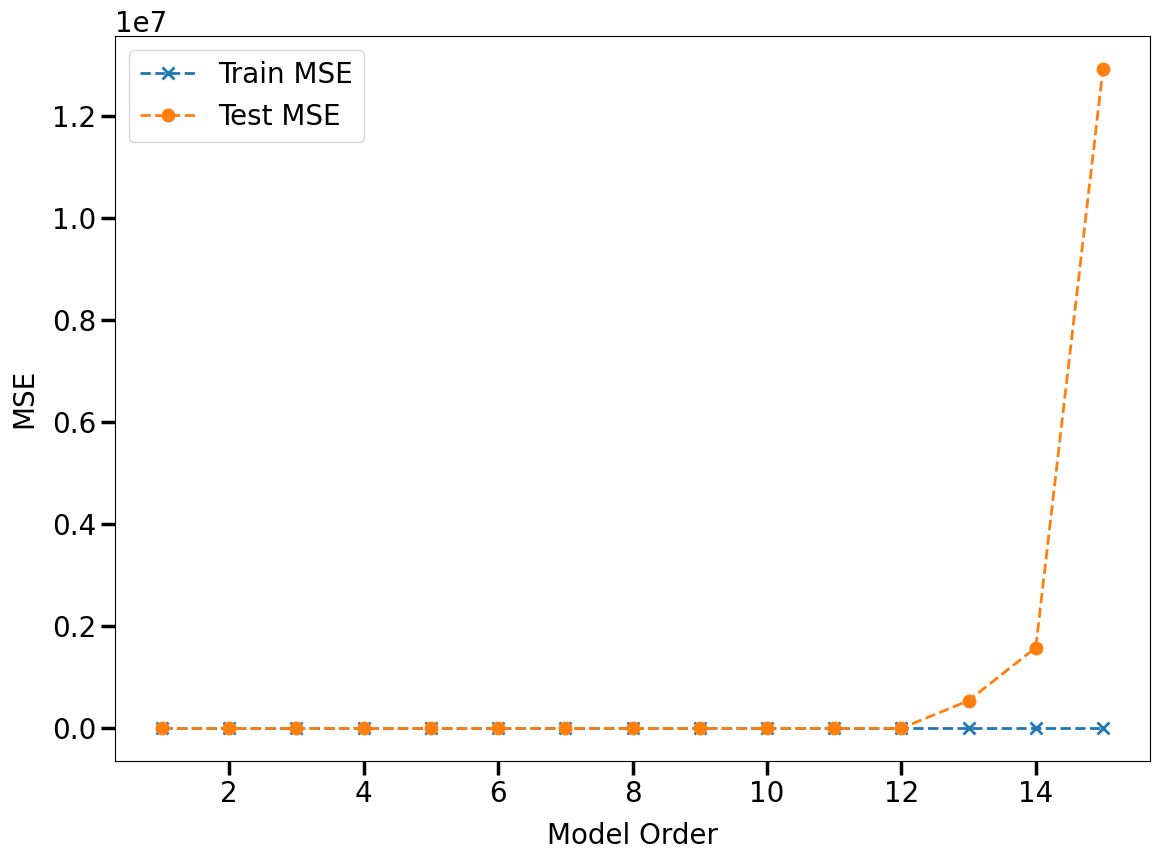

In [125]:
max_order = 15
model_class = PolynomialModel

train_mse_list = []
test_mse_list = []
for order in range(1, max_order+1):
    model = model_class(order)
    train_mse_list.append(model.fit(x_train, y_train))
    test_mse = np.mean((model.predict(x_test) - y_test)**2)
    test_mse_list.append(test_mse)

best_train_order = np.argmin(np.array(train_mse_list)) + 1
print(f'Best train model has order {best_train_order} with train/test MSE is {train_mse_list[best_train_order-1]} / {test_mse_list[best_train_order-1]}.')

best_test_order = np.argmin(np.array(test_mse_list)) + 1
print(f'Best test model has order {best_test_order} with train/test MSE is {train_mse_list[best_test_order-1]} / {test_mse_list[best_test_order-1]}.')

plt.close('all')
plt.figure()
plt.plot(list(range(1,max_order+1)), train_mse_list, 'x--', label='Train MSE')
plt.plot(list(range(1,max_order+1)), test_mse_list, 'o--', label='Test MSE')
plt.legend()
plt.xlabel('Model Order')
plt.ylabel('MSE')
plt.tight_layout()
plt.savefig(f"mse_order_{max_order}.png", format='png')

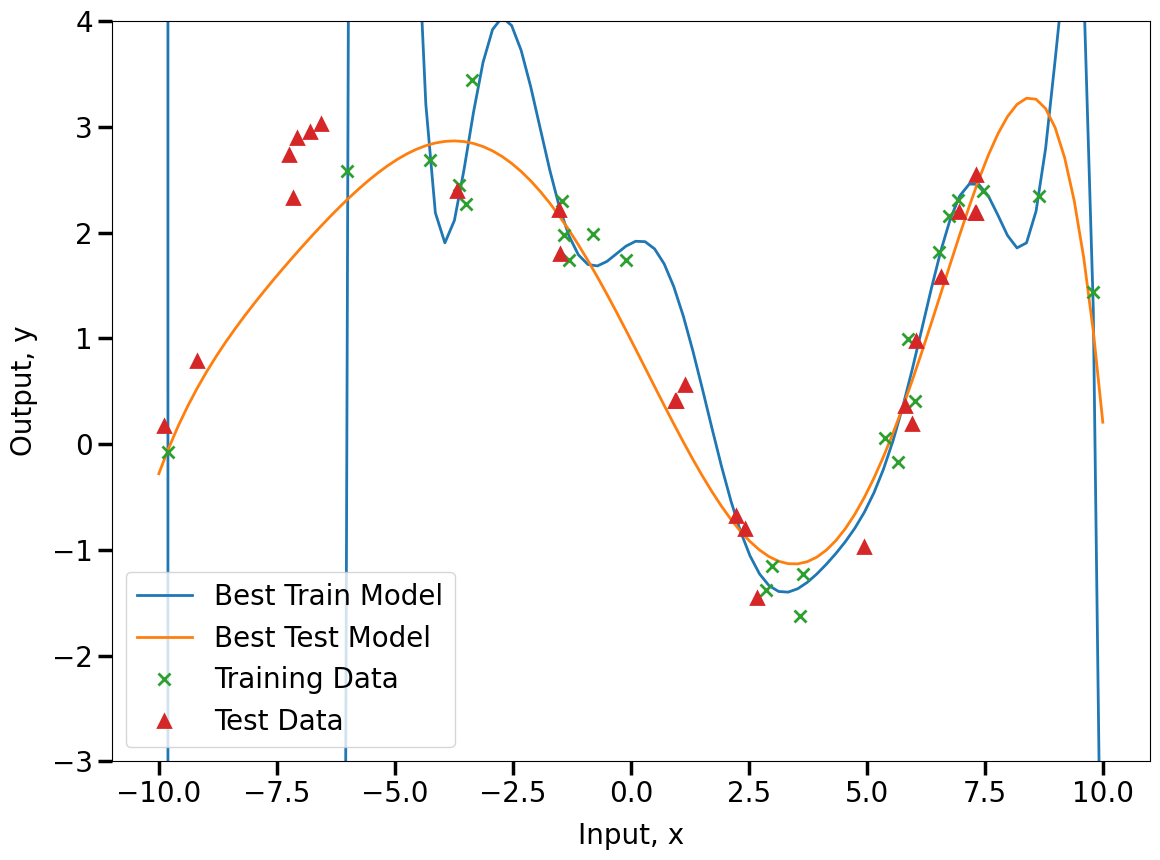

In [119]:
best_train_model = model_class(best_train_order)
_ = best_train_model.fit(x_train, y_train)

best_test_model = model_class(best_test_order)
_ = best_test_model.fit(x_train, y_train)


x_support = torch.linspace(-10., 10., 100).numpy()
plt.close('all')
plt.figure()
plt.plot(x_support, best_train_model.predict(x_support), label='Best Train Model')
plt.plot(x_support, best_test_model.predict(x_support), label='Best Test Model')
plt.plot(x_train, y_train, 'x', label='Training Data')
plt.plot(x_test, y_test, '^', label='Test Data')
plt.legend()
plt.xlabel('Input, x')
plt.ylabel('Output, y')
plt.ylim([-3, 4])
plt.tight_layout()
plt.savefig("approximated_systems.png", format="png")

In [126]:
from src.utils import array_to_md

In [127]:
array_to_md.array_to_md(np.array([np.arange(1, max_order + 1), train_mse_list, test_mse_list]).T)

| 1 | 1.975 | 1.645 |
| 2 | 1.946 | 1.571 |
| 3 | 0.986 | 0.677 |
| 4 | 0.736 | 0.527 |
| 5 | 0.202 | 0.998 |
| 6 | 0.164 | 0.251 |
| 7 | 0.107 | 0.404 |
| 8 | 0.082 | 1.464 |
| 9 | 0.081 | 0.414 |
| 10 | 0.076 | 27.591 |
| 11 | 0.076 | 61.323 |
| 12 | 0.075 | 2037.449 |
| 13 | 0.052 | 543525.453 |
| 14 | 0.051 | 1583011.914 |
| 15 | 0.102 | 12917089.771 |



In [122]:
np.array([np.arange(1, max_order + 1), train_mse_list, test_mse_list])[0, 0].is_integer()

True